In [1]:
from fastai.vision.all import*

In [2]:
import fastai
print(fastai.__version__)


2.7.12


In [3]:
import torch
print(torch.cuda.is_available())

True


In [2]:
#!kaggle datasets download -d gpiosenka/cards-image-datasetclassification


  0%|          | 0.00/385M [00:00<?, ?B/s]
  0%|          | 1.00M/385M [00:00<00:51, 7.83MB/s]
  1%|          | 2.00M/385M [00:00<00:47, 8.42MB/s]
  1%|          | 3.00M/385M [00:00<00:46, 8.53MB/s]
  1%|          | 4.00M/385M [00:00<00:46, 8.56MB/s]
  1%|▏         | 5.00M/385M [00:00<00:45, 8.73MB/s]
  2%|▏         | 6.00M/385M [00:00<00:45, 8.80MB/s]
  2%|▏         | 7.00M/385M [00:00<00:44, 8.83MB/s]
  2%|▏         | 8.00M/385M [00:00<00:46, 8.59MB/s]
  2%|▏         | 9.00M/385M [00:01<00:45, 8.58MB/s]
  3%|▎         | 10.0M/385M [00:01<00:45, 8.72MB/s]
  3%|▎         | 11.0M/385M [00:01<00:44, 8.75MB/s]
  3%|▎         | 12.0M/385M [00:01<00:45, 8.60MB/s]
  3%|▎         | 13.0M/385M [00:01<00:45, 8.49MB/s]
  4%|▍         | 15.0M/385M [00:01<00:42, 9.13MB/s]
  4%|▍         | 16.0M/385M [00:01<00:41, 9.30MB/s]
  4%|▍         | 17.0M/385M [00:02<00:41, 9.28MB/s]
  5%|▍         | 19.0M/385M [00:02<00:39, 9.77MB/s]
  5%|▌         | 21.0M/385M [00:02<00:37, 10.1MB/s]
  6%|▌         | 22.

In [11]:
#import zipfile

#with zipfile.ZipFile('cards-image-datasetclassification.zip', 'r') as zip_ref:
    #zip_ref.extractall('path_to_extract_to')


In [4]:
path = Path('./path_to_extract_to/')

In [5]:
cards = DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
).dataloaders(path,bs=32)

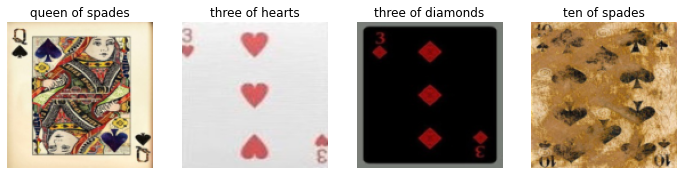

In [6]:
cards.show_batch(max_n=4, nrows=1)

In [7]:
learn = vision_learner(cards,resnet50,metrics=error_rate )
learn.fine_tune(20)

c:\Users\Justin\anaconda3\envs\dev\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,3.165526,2.395860,0.641718,00:39


epoch,train_loss,valid_loss,error_rate,time
0,1.761905,1.452540,0.411043,00:40
1,1.094120,1.138252,0.317178,00:40
2,0.691281,1.069034,0.290798,00:39
3,0.504705,0.966053,0.246012,00:39
4,0.409217,0.960387,0.249693,00:40
5,0.384569,0.890969,0.219632,00:39
6,0.284201,0.814140,0.203067,00:39
7,0.266525,0.806406,0.201840,00:39
8,0.161180,0.713230,0.171166,00:39
9,0.149428,0.770420,0.174847,00:39


In [19]:
#learn.save("card_classifier.pkl")

Path('models/card_classifier.pkl.pth')

In [20]:
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

In [18]:
learn.export('card_classifier_update.pkl')

In [8]:
cards2 = DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
).dataloaders(path,bs=64)

In [9]:
learn2 = vision_learner(cards,resnet50,metrics=error_rate)

In [17]:
learn2.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,time
0,3.140003,2.327497,0.622699,00:34


epoch,train_loss,valid_loss,error_rate,time
0,1.729352,1.462670,0.407975,00:40
1,1.048445,1.120589,0.317791,00:40
2,0.732354,1.022609,0.274233,00:39
3,0.533962,0.898116,0.243558,00:38
4,0.417242,0.868320,0.226380,00:38
5,0.294239,0.781915,0.192025,00:38
6,0.199187,0.817160,0.199387,00:38
7,0.177633,0.820736,0.188957,00:39
8,0.089515,0.627147,0.155215,00:38
9,0.059641,0.649496,0.147853,00:38
